In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
SMALL_SIZE  = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size        = MEDIUM_SIZE)    # controls default text sizes
plt.rc('axes', titlesize   = SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize   = MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize  = MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize  = MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)   # fontsize of the figure title

In [4]:
path = "results"

In [5]:
def plot_best_fitness(rg, folders, leg, filename):
    
    ## melhores fitness
    best_fitness = pd.DataFrame()

    for f in folders:
        tests        = pd.read_csv(os.path.join(path, f, "mean_fitness_report.csv"), header = 0)
        best_fitness = pd.concat([best_fitness, tests["best"]], axis = 1)

    best_fitness.columns = folders
    best_fitness.index   = range(1, rg + 1)
    
    ax  = best_fitness.plot(figsize = (15, 5))
   
    ax.legend(leg)

    ax.set_ylabel("Fitness do melhor indivíduo")
    ax.set_xlabel("Gerações") 

    ax.grid(True)

    plt.tight_layout()
    plot_name = "plots/{}_best_fitness.pdf".format(filename)
    plt.savefig(plot_name, dpi = 600)

In [6]:
def plot_mean_size(rg, evals, folders, leg, filename):
    
    evals    = ["population_size_evaluation{}.csv".format(i) for i in range(1, evals + 1)]
    df_pop   = pd.DataFrame()

    for f in folders:
        pop_size = pd.DataFrame()

        for e in evals:
            tests     = pd.read_csv(os.path.join(path, f, e), header = 0)
            mean_size = tests.mean(axis = 0)
            pop_size  = pd.concat([pop_size, mean_size], axis = 1, ignore_index = True, sort = False)

        total_mean = pop_size.mean(axis = 1)

        df_pop = pd.concat([df_pop, total_mean], axis = 1, ignore_index = True, sort = False)

    df_pop.index = range(1, rg + 1)
    
    ax  = df_pop.plot(figsize = (15, 5))

    ax.legend(leg)

    ax.set_ylabel("Tamanho médio da população")
    ax.set_xlabel("Gerações")

    ax.grid(True)

    plt.tight_layout()
    plot_name = "plots/{}_pop_size.pdf".format(filename)
    plt.savefig(plot_name, dpi = 600)

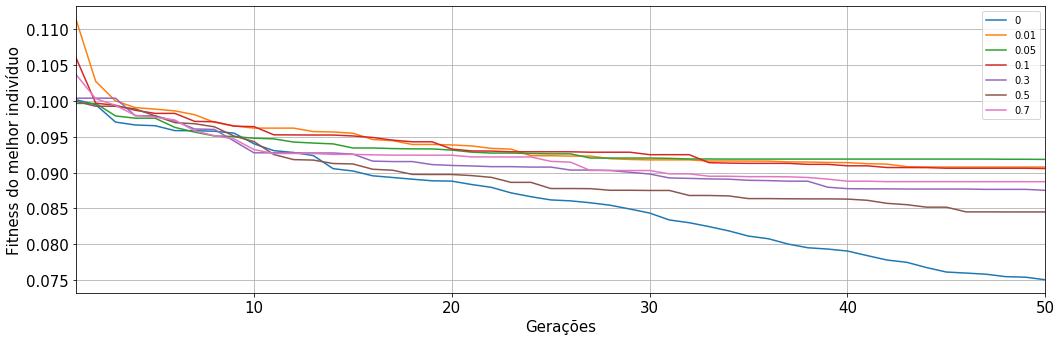

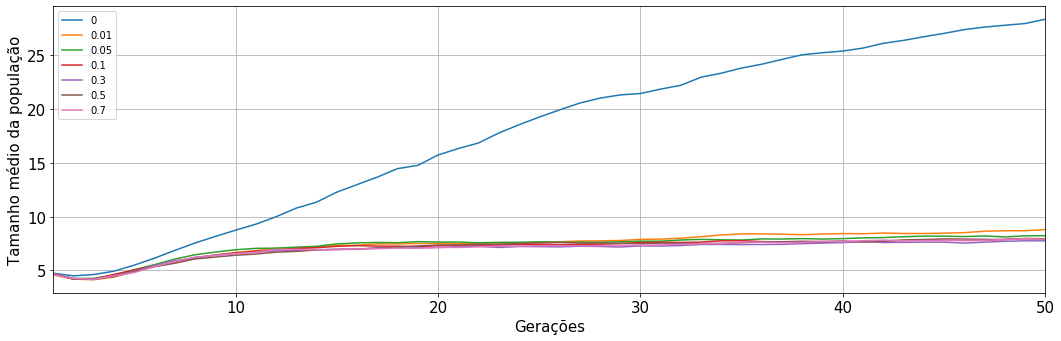

In [13]:
## penalidades
pen_folders  = ["00{}".format(i) for i in range(1, 8)]
pen_leg      = ["0", "0.01", "0.05", "0.1", "0.3", "0.5", "0.7"]
pen_filename = "penalidade"

plot_best_fitness(50, pen_folders, pen_leg, pen_filename)

plot_mean_size(50, 30, pen_folders, pen_leg, pen_filename)

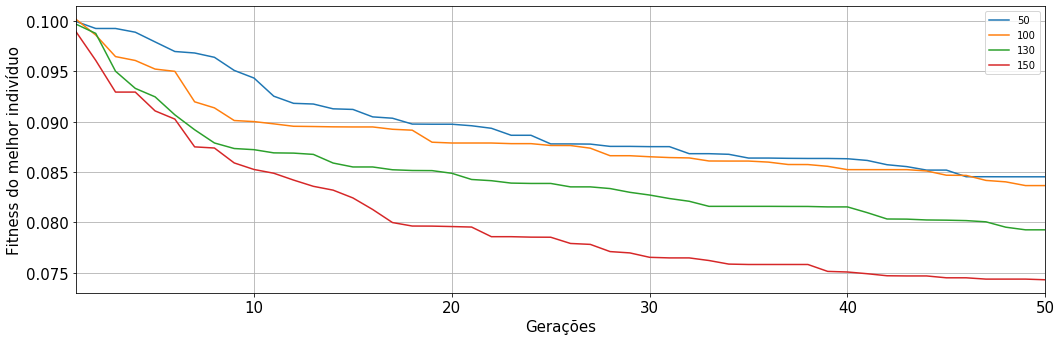

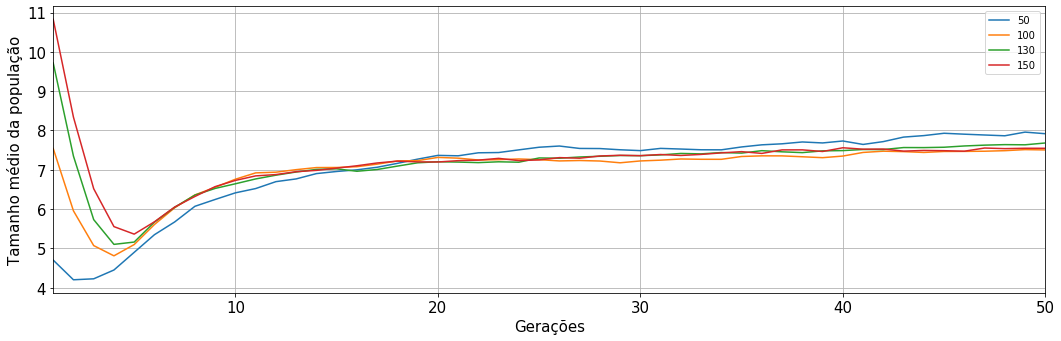

In [14]:
## population size
## tirando o de 10 por ser muito destoante
pop_folders  = ["006"] + ["{:03d}".format(i) for i in range(8, 12)]
pop_folders  = pop_folders[:2] + pop_folders[-2:]

pop_leg      = ["50", "100", "130", "150"]
pop_filename = "populacao"

plot_best_fitness(50, pop_folders, pop_leg, pop_filename)

plot_mean_size(50, 30, pop_folders, pop_leg, pop_filename)

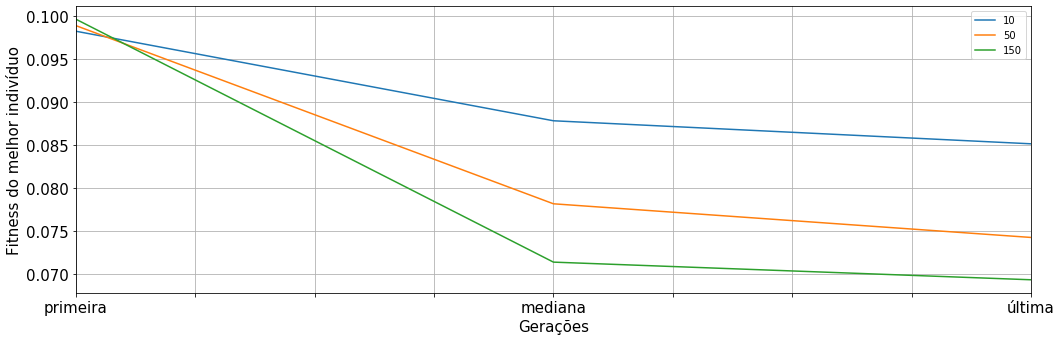

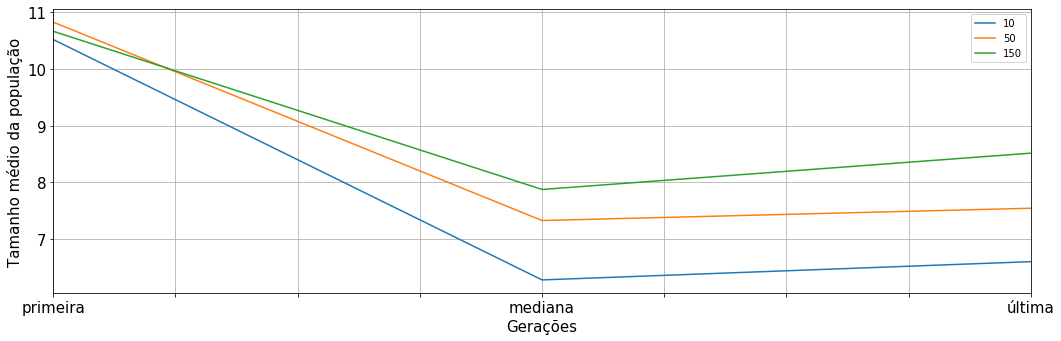

In [8]:
## generations
gen_folders  = ["{:03d}".format(i) for i in range(11, 14)]

bf_gens = []

for f in gen_folders:
    t1 = pd.read_csv(os.path.join(path, f, "mean_fitness_report.csv"), header = 0, usecols = [1])
    bf_gens.append([t1.head(1).values[0][0], t1.median().values[0], t1.tail(1).values[0][0]])

df_gens       = pd.DataFrame({"50": bf_gens[0], "150": bf_gens[1], "10": bf_gens[2]})
df_gens.index = ["primeira", "mediana", "última"]

ax = df_gens[["10", "50", "150"]].plot(figsize = (15, 5))

ax.set_ylabel("Fitness do melhor indivíduo")
ax.set_xlabel("Gerações")

ax.grid(True)

plt.tight_layout()
plot_name = "plots/geracao_best_fitness.pdf"
plt.savefig(plot_name, dpi = 600)


evals     = ["population_size_evaluation{}.csv".format(i) for i in range(1, 31)]
df_pop    = pd.DataFrame()
size_gens = []

for f in gen_folders:
    pop_size = pd.DataFrame()

    for e in evals:
        tests     = pd.read_csv(os.path.join(path, f, e), header = 0)
        mean_size = tests.mean(axis = 0)
        pop_size  = pd.concat([pop_size, mean_size], axis = 1, ignore_index = True, sort = False)

    tmean = pop_size.mean(axis = 1)
    size_gens.append([tmean.head(1).values[0], tmean.median(), tmean.tail(1).values[0]])
    
df_size = pd.DataFrame({"50": size_gens[0], "150": size_gens[1], "10": size_gens[2]})
df_size.index = ["primeira", "mediana", "última"]

ax1 = df_size[["10", "50", "150"]].plot(figsize = (15, 5))

ax1.set_ylabel("Tamanho médio da população")
ax1.set_xlabel("Gerações")

ax1.grid(True)

plt.tight_layout()
plot_name = "plots/geracao_pop_size.pdf"
plt.savefig(plot_name, dpi = 600)

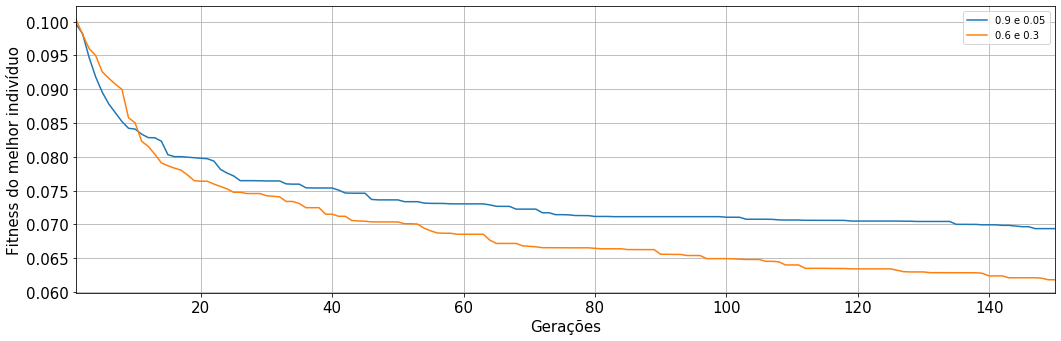

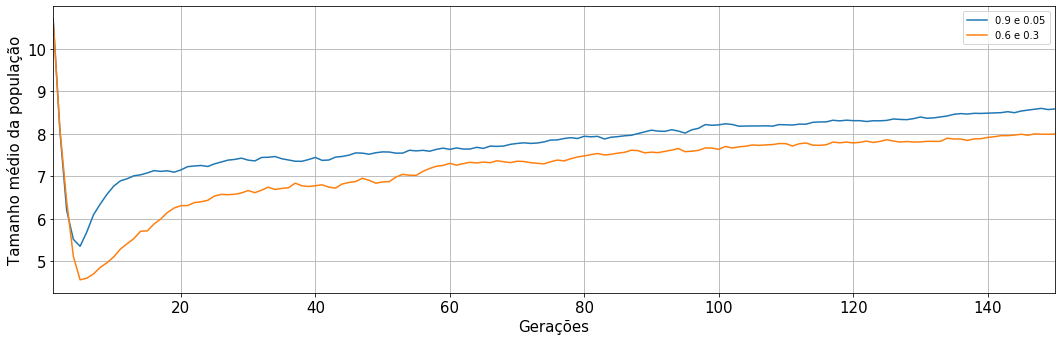

In [15]:
## probs crossover e mutation
prob_folders  = ["012", "014"]

prob_leg      = ["0.9 e 0.05", "0.6 e 0.3"]
prob_filename = "probs"

plot_best_fitness(150, prob_folders, prob_leg, prob_filename)

plot_mean_size(150, 30, prob_folders, prob_leg, prob_filename)

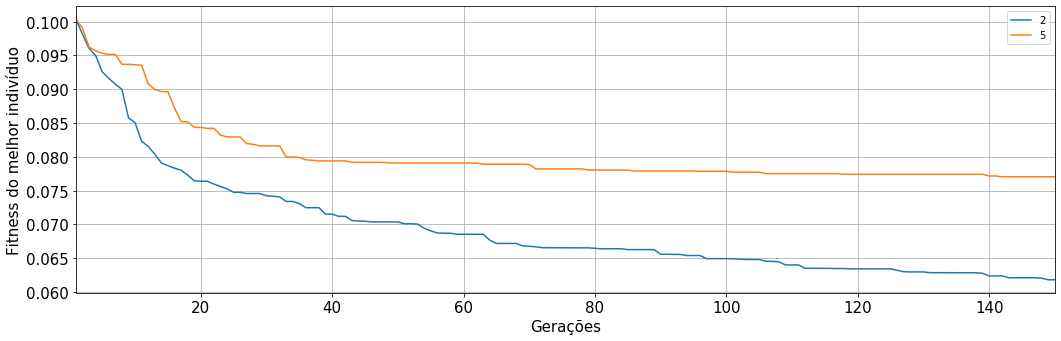

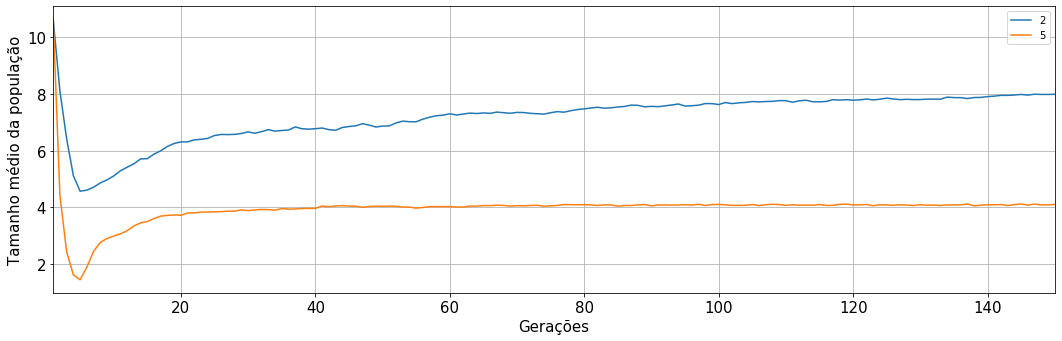

In [16]:
## torneio
torn_folders  = ["014", "015"]

torn_leg      = ["2", "5"]
torn_filename = "torneio"

plot_best_fitness(150, torn_folders, torn_leg, torn_filename)

plot_mean_size(150, 30, torn_folders, torn_leg, torn_filename)

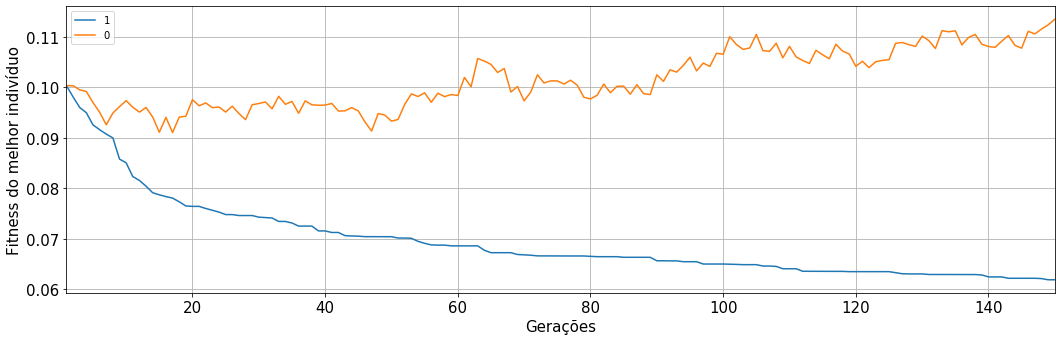

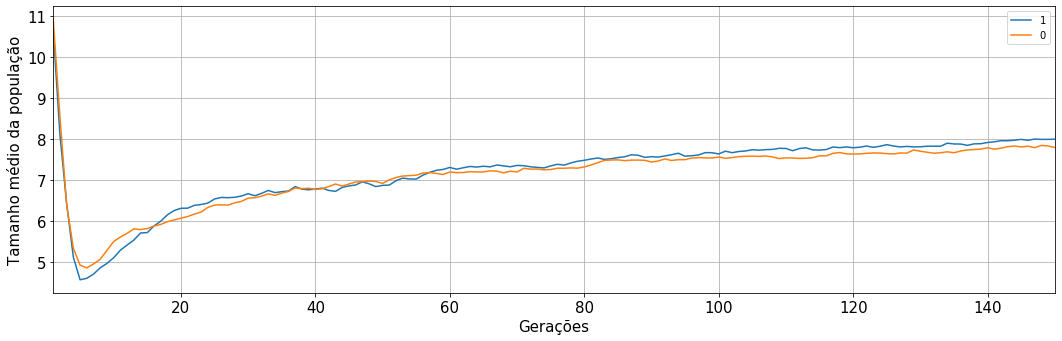

In [17]:
## elitismo
elit_folders  = ["014", "016"]

elit_leg      = ["1", "0"]
elit_filename = "elitismo"

plot_best_fitness(150, elit_folders, elit_leg, elit_filename)

plot_mean_size(150, 30, elit_folders, elit_leg, elit_filename)

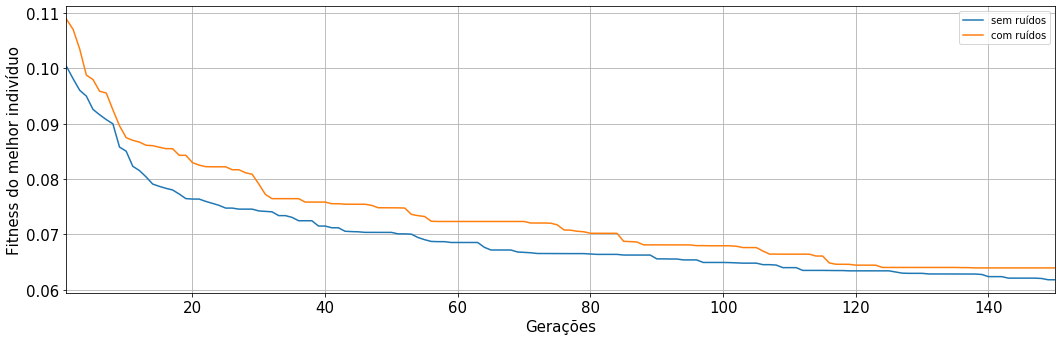

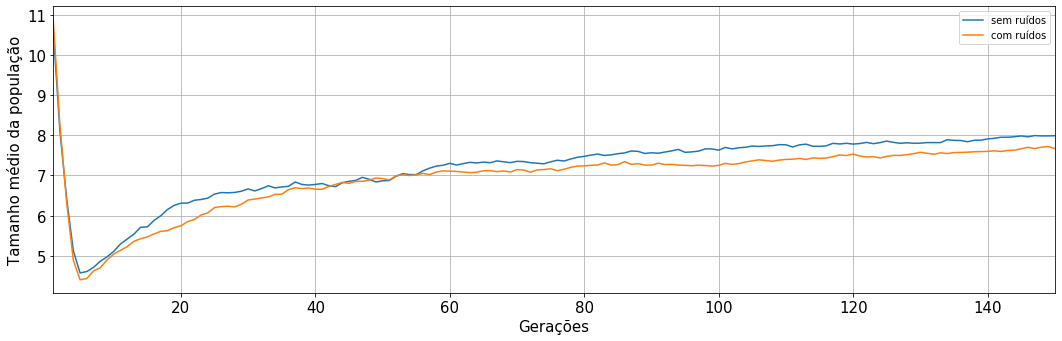

In [18]:
## ruídos
rui_folders  = ["014", "017"]

rui_leg      = ["sem ruídos", "com ruídos"]
rui_filename = "ruido"

plot_best_fitness(150, rui_folders, rui_leg, rui_filename)

plot_mean_size(150, 30, rui_folders, rui_leg, rui_filename)

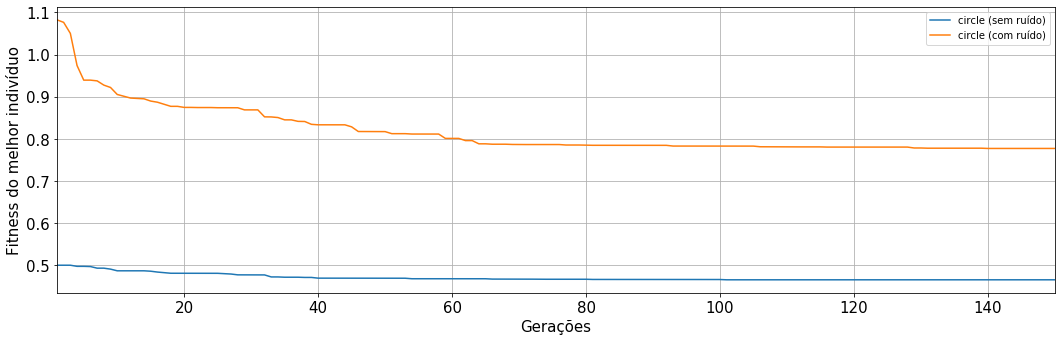

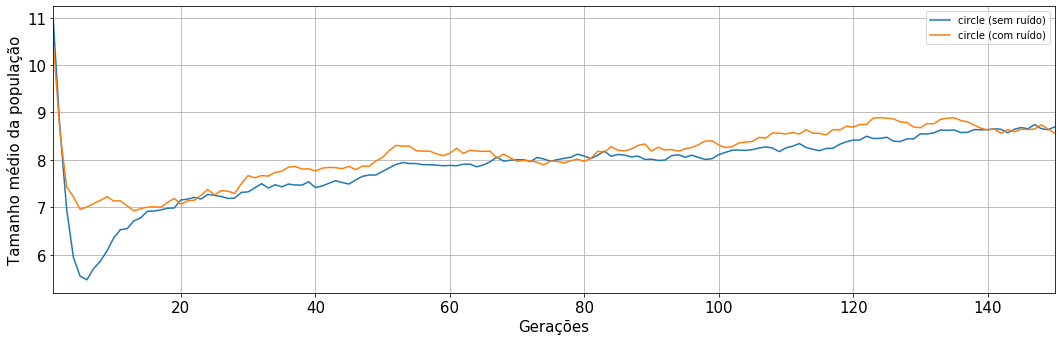

In [7]:
## circle
circ_folders  = ["019", "020"]

circ_leg      = ["circle (sem ruído)", "circle (com ruído)"]
circ_filename = "circle_ruido"

plot_best_fitness(150, circ_folders, circ_leg, circ_filename)

plot_mean_size(150, 30, circ_folders, circ_leg, circ_filename)

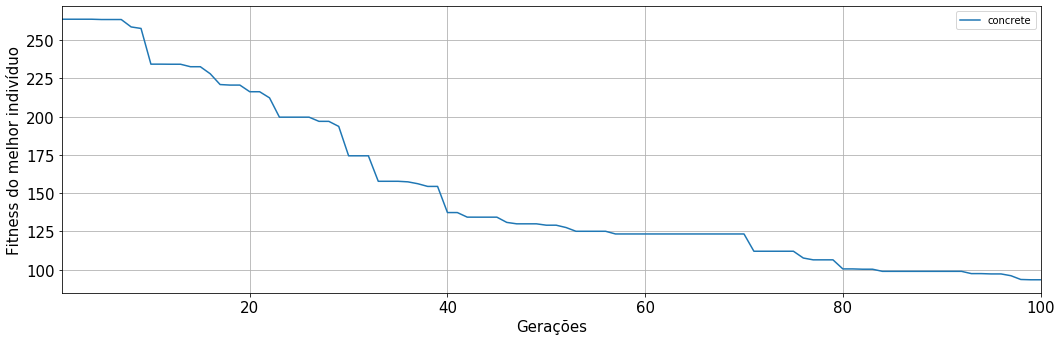

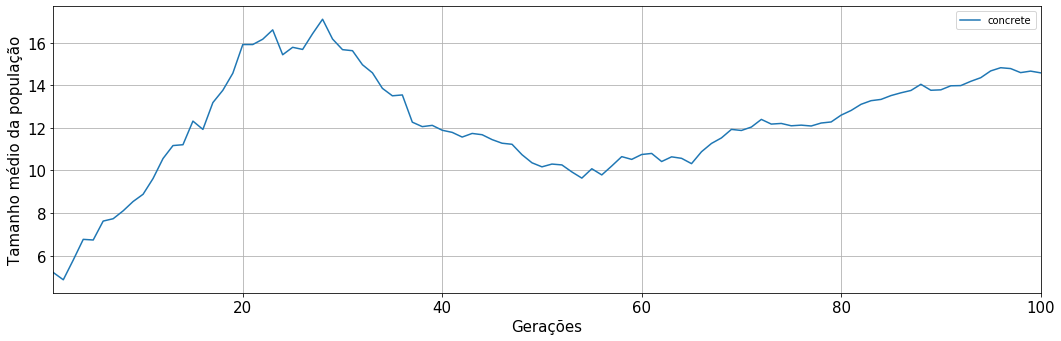

In [16]:
## base de dados real
cronc_folders  = ["018"]

cronc_leg      = ["concrete"]
cronc_filename = "concrete"

plot_best_fitness(100, cronc_folders, cronc_leg, cronc_filename)

plot_mean_size(100, 30, cronc_folders, cronc_leg, cronc_filename)